<a href="https://colab.research.google.com/github/cicada0521/Finance/blob/main/6_week_data_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Weekly Amount Forecasting Tool
All required libraries are installed.
1. Upload your own CSV file
2. Create a sample CSV file for testing
Enter your choice (1 or 2): 1
Please upload your CSV file with 'date' and 'amount' columns...


Saving dataset1.csv to dataset1 (1).csv
Successfully uploaded: dataset1 (1).csv
Data columns and types:
date       object
amount    float64
dtype: object

First few rows:
         date      amount
0  01-01-2023        0.00
1  02-01-2023  3385796.30
2  03-01-2023  4136908.58
3  04-01-2023  4469895.06
4  05-01-2023  5002055.67


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


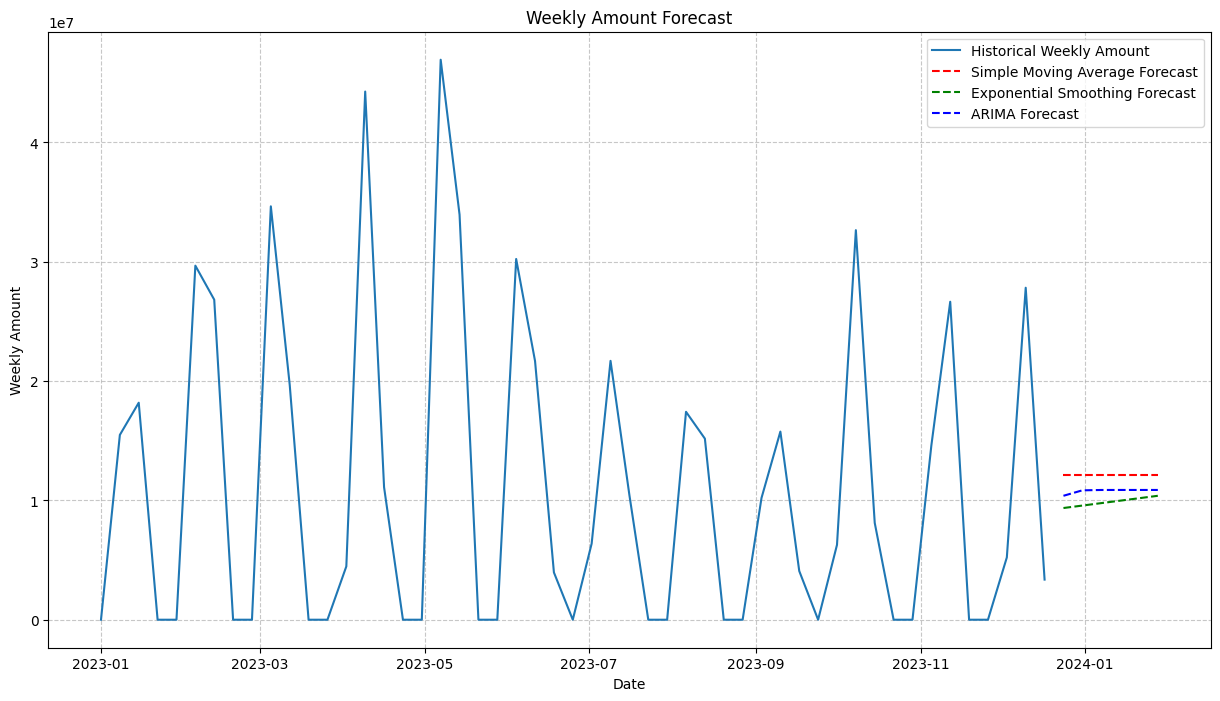


Forecast Performance:

Simple Moving Average:
Average Forecast: 12135846.94
Forecast Range: (np.float64(12135846.94), np.float64(12135846.94))
Percentage Changes: ['260.96%', '260.96%', '260.96%', '260.96%', '260.96%', '260.96%']

Exponential Smoothing:
Average Forecast: 9873562.107909236
Forecast Range: (9361591.366486384, 10385532.849332089)
Percentage Changes: ['178.45%', '184.54%', '190.63%', '196.72%', '202.81%', '208.90%']

ARIMA:
Average Forecast: 10787660.84802288
Forecast Range: (10386275.847551966, 10874730.612219324)
Percentage Changes: ['208.92%', '222.51%', '223.39%', '223.45%', '223.45%', '223.45%']

Forecast Results for the Next 6 Weeks:

Simple Moving Average:
  2023-12-24: 12135846.94
  2023-12-31: 12135846.94
  2024-01-07: 12135846.94
  2024-01-14: 12135846.94
  2024-01-21: 12135846.94
  2024-01-28: 12135846.94

Exponential Smoothing:
  2023-12-24: 9361591.37
  2023-12-31: 9566379.66
  2024-01-07: 9771167.96
  2024-01-14: 9975956.26
  2024-01-21: 10180744.55
  2024-0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from google.colab import files
import io

class WeeklyAmountForecasting:
    def __init__(self, file_content=None, file_path=None):
        """
        Initialize the forecasting class with data

        :param file_content: Content of the uploaded file (for Colab usage)
        :param file_path: Path to the CSV file (for local usage)
        """
        if file_content:
            self.daily_data = self.load_data_from_content(file_content)
        elif file_path:
            self.daily_data = self.load_data_from_path(file_path)
        else:
            print("No data provided. Please upload a file or provide a path.")
            self.daily_data = None
            return

        if self.daily_data is not None:
            self.weekly_data = self.convert_to_weekly()

    def load_data_from_path(self, file_path):
        """
        Load data from CSV file path

        :param file_path: Path to the CSV file
        :return: Pandas DataFrame with data
        """
        try:
            # First load the data to inspect it
            data = pd.read_csv(file_path)

            # Print data info to debug
            print("Data columns and types:")
            print(data.dtypes)
            print("\nFirst few rows:")
            print(data.head())

            # Check if 'date' column exists
            if 'date' not in data.columns:
                print("Error: 'date' column not found in the CSV file.")
                return None

            # Check if 'amount' column exists
            if 'amount' not in data.columns:
                print("Error: 'amount' column not found in the CSV file.")
                return None

            # Convert date column to datetime
            data['date'] = pd.to_datetime(data['date'], errors='coerce')

            # Check for NaT values after conversion
            if data['date'].isna().any():
                print("Warning: Some date values couldn't be parsed. Check your date format.")

            # Drop rows with NaT dates
            data = data.dropna(subset=['date'])

            # Set the date as index
            data.set_index('date', inplace=True)

            # Ensure amount is numeric
            data['amount'] = pd.to_numeric(data['amount'], errors='coerce')
            data = data.dropna(subset=['amount'])

            return data

        except Exception as e:
            print(f"Error loading data from path: {e}")
            return None

    def load_data_from_content(self, content):
        """
        Load data from uploaded file content

        :param content: Content of the uploaded file
        :return: Pandas DataFrame with data
        """
        try:
            # First load the data to inspect it
            data = pd.read_csv(io.BytesIO(content))

            # Print data info to debug
            print("Data columns and types:")
            print(data.dtypes)
            print("\nFirst few rows:")
            print(data.head())

            # Check if 'date' column exists
            if 'date' not in data.columns:
                print("Error: 'date' column not found in the CSV file.")
                return None

            # Check if 'amount' column exists
            if 'amount' not in data.columns:
                print("Error: 'amount' column not found in the CSV file.")
                return None

            # Convert date column to datetime
            data['date'] = pd.to_datetime(data['date'], errors='coerce')

            # Check for NaT values after conversion
            if data['date'].isna().any():
                print("Warning: Some date values couldn't be parsed. Check your date format.")

            # Drop rows with NaT dates
            data = data.dropna(subset=['date'])

            # Set the date as index
            data.set_index('date', inplace=True)

            # Ensure amount is numeric
            data['amount'] = pd.to_numeric(data['amount'], errors='coerce')
            data = data.dropna(subset=['amount'])

            return data

        except Exception as e:
            print(f"Error loading data from content: {e}")
            return None

    def convert_to_weekly(self):
        """
        Convert daily data to weekly data

        :return: Pandas DataFrame with weekly aggregated data
        """
        try:
            # Verify that index is DatetimeIndex
            if not isinstance(self.daily_data.index, pd.DatetimeIndex):
                print("Error: Index is not a DatetimeIndex. Current index type:", type(self.daily_data.index))
                # Try to convert the index to datetime if it's not already
                try:
                    self.daily_data.index = pd.to_datetime(self.daily_data.index)
                    print("Successfully converted index to DatetimeIndex.")
                except Exception as e:
                    print(f"Failed to convert index to DatetimeIndex: {e}")
                    return None

            # Now try to resample
            weekly_data = self.daily_data.resample('W').sum()
            return weekly_data

        except Exception as e:
            print(f"Error converting to weekly data: {e}")
            print("Data index type:", type(self.daily_data.index))
            return None

    def forecast_methods(self, periods=6):
        """
        Apply multiple forecasting methods

        :param periods: Number of periods to forecast
        :return: Dictionary of forecasting results
        """
        if self.weekly_data is None:
            print("Error: Weekly data not available.")
            return {}

        if 'amount' not in self.weekly_data.columns:
            print("Error: 'amount' column missing in weekly data.")
            print("Available columns:", self.weekly_data.columns.tolist())
            return {}

        # Prepare data
        weekly_amount = self.weekly_data['amount']
        if len(weekly_amount) < 10:
            print("Warning: Limited data points available for forecasting. Results may not be reliable.")

        # Forecasting methods
        forecasts = {}

        # 1. Simple Moving Average
        def simple_moving_average(data, window=3, periods=6):
            if len(data) < window:
                print(f"Warning: Not enough data for {window}-period moving average.")
                return [data.mean()] * periods
            ma = data.rolling(window=window).mean()
            forecast = [ma.iloc[-1]] * periods
            return forecast

        # 2. Exponential Smoothing
        def exponential_smoothing(data, periods=6):
            try:
                # Fit the model
                model = ExponentialSmoothing(data,
                                           trend='add',
                                           seasonal=None).fit()
                # Forecast
                forecast = model.forecast(steps=periods)
                return forecast
            except Exception as e:
                print(f"Error in exponential smoothing: {e}")
                return [data.mean()] * periods

        # 3. ARIMA Forecasting
        def arima_forecast(data, periods=6):
            try:
                # Fit ARIMA model
                model = ARIMA(data, order=(1,1,1)).fit()
                # Forecast
                forecast = model.forecast(steps=periods)
                return forecast
            except Exception as e:
                print(f"Error in ARIMA forecasting: {e}")
                return [data.mean()] * periods

        # Generate forecasts
        try:
            forecasts['Simple Moving Average'] = simple_moving_average(weekly_amount, periods=periods)
            forecasts['Exponential Smoothing'] = exponential_smoothing(weekly_amount, periods=periods)
            forecasts['ARIMA'] = arima_forecast(weekly_amount, periods=periods)
        except Exception as e:
            print(f"Error generating forecasts: {e}")

        return forecasts

    def visualize_forecast(self, forecasts):
        """
        Visualize historical data and forecasts

        :param forecasts: Dictionary of forecast results
        """
        if not forecasts or self.weekly_data is None:
            print("No forecasts or weekly data available to visualize.")
            return

        plt.figure(figsize=(15,8))
        plt.title('Weekly Amount Forecast')

        # Plot historical data
        plt.plot(self.weekly_data.index, self.weekly_data['amount'],
                 label='Historical Weekly Amount')

        # Generate forecast dates
        last_date = self.weekly_data.index[-1]
        periods = len(next(iter(forecasts.values()))) + 1
        forecast_dates = pd.date_range(start=last_date,
                                       periods=periods,
                                       freq='W')[1:]

        # Plot different forecast methods
        colors = ['red', 'green', 'blue']
        for (method, forecast), color in zip(forecasts.items(), colors):
            plt.plot(forecast_dates, forecast,
                     label=f'{method} Forecast',
                     color=color,
                     linestyle='--')

        plt.xlabel('Date')
        plt.ylabel('Weekly Amount')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

    def forecast_performance(self, forecasts):
        """
        Calculate forecast performance metrics

        :param forecasts: Dictionary of forecast results
        :return: Dictionary of performance metrics
        """
        if not forecasts or self.weekly_data is None or 'amount' not in self.weekly_data.columns:
            print("No forecasts or weekly data available for performance analysis.")
            return {}

        performance = {}

        for method, forecast in forecasts.items():
            try:
                # Calculate percentage change
                current_value = self.weekly_data['amount'].iloc[-1]
                perc_changes = [(f - current_value) / current_value * 100 if current_value != 0 else 0
                                for f in forecast]

                performance[method] = {
                    'Average Forecast': np.mean(forecast),
                    'Forecast Range': (min(forecast), max(forecast)),
                    'Percentage Changes': [f"{p:.2f}%" for p in perc_changes]
                }
            except Exception as e:
                print(f"Error calculating performance for {method}: {e}")

        return performance

def upload_and_forecast():
    """
    Function to handle file upload in Google Colab and run the forecasting
    """
    print("Please upload your CSV file with 'date' and 'amount' columns...")
    uploaded = files.upload()

    if not uploaded:
        print("No file was uploaded.")
        return

    # Get the first uploaded file
    file_name = next(iter(uploaded))
    file_content = uploaded[file_name]

    print(f"Successfully uploaded: {file_name}")

    # Sample data if no file is uploaded (for testing purposes)
    if file_name.endswith('.csv'):
        # Initialize forecasting with the uploaded content
        amount_forecast = WeeklyAmountForecasting(file_content=file_content)
    else:
        print("Uploaded file is not a CSV. Please upload a CSV file.")
        return

    if amount_forecast.daily_data is None:
        print("Failed to load data. Make sure your CSV has 'date' and 'amount' columns.")
        # Display a sample of expected CSV format
        print("\nExpected CSV format example:")
        print("date,amount\n2023-01-01,100\n2023-01-02,150\n...")
        return

    if amount_forecast.weekly_data is None:
        print("Failed to create weekly data. Check that your dates are in a proper format.")
        return

    # Generate forecasts for the next 6 weeks
    forecasts = amount_forecast.forecast_methods(periods=6)

    if not forecasts:
        print("Failed to generate forecasts.")
        return

    # Visualize forecasts
    amount_forecast.visualize_forecast(forecasts)

    # Print forecast performance
    performance = amount_forecast.forecast_performance(forecasts)

    print("\nForecast Performance:")
    for method, metrics in performance.items():
        print(f"\n{method}:")
        for key, value in metrics.items():
            print(f"{key}: {value}")

    # Print the forecast results in a structured manner
    print("\nForecast Results for the Next 6 Weeks:")

    # Generate forecast dates for better display
    last_date = amount_forecast.weekly_data.index[-1]
    forecast_dates = pd.date_range(start=last_date, periods=7, freq='W')[1:]

    for method, forecast_values in forecasts.items():
        print(f"\n{method}:")
        for date, value in zip(forecast_dates, forecast_values):
            print(f"  {date.date()}: {value:.2f}")

    return amount_forecast, forecasts

def create_sample_data():
    """
    Create and download a sample CSV file for testing
    """
    # Create sample data
    dates = pd.date_range(start='2023-01-01', periods=90, freq='D')
    np.random.seed(42)  # For reproducible results

    # Create trend with weekly seasonality and some noise
    trend = np.linspace(100, 200, 90)
    day_of_week = np.array([d.dayofweek for d in dates])
    seasonal = 20 * np.sin(2 * np.pi * day_of_week / 7)
    noise = np.random.normal(0, 10, 90)

    amounts = trend + seasonal + noise

    # Create DataFrame
    df = pd.DataFrame({
        'date': dates,
        'amount': amounts
    })

    # Save to CSV
    csv_data = df.to_csv(index=False)

    # Create downloadable link
    from IPython.display import HTML
    import base64

    b64 = base64.b64encode(csv_data.encode()).decode()
    href = f'<a href="data:text/csv;base64,{b64}" download="sample_dataset.csv">Download Sample CSV Dataset</a>'

    display(HTML(href))
    print("Sample data created. Click the link above to download.")

    # Also display the first few rows
    print("\nSample data preview:")
    print(df.head())

# Function to check if the required libraries are installed
def check_libraries():
    try:
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
        from statsmodels.tsa.holtwinters import ExponentialSmoothing
        from statsmodels.tsa.arima.model import ARIMA
        print("All required libraries are installed.")
        return True
    except ImportError as e:
        print(f"Missing library: {e}")
        print("Installing required libraries...")
        try:
            import sys
            !{sys.executable} -m pip install pandas numpy matplotlib statsmodels
            print("Libraries installed successfully.")
            return True
        except Exception as e:
            print(f"Failed to install libraries: {e}")
            return False

# Main function for Colab
def main():
    print("Weekly Amount Forecasting Tool")
    print("==============================")

    # Check libraries first
    if not check_libraries():
        print("Please run this cell again after installation is complete.")
        return

    print("1. Upload your own CSV file")
    print("2. Create a sample CSV file for testing")

    choice = input("Enter your choice (1 or 2): ")

    if choice == '1':
        upload_and_forecast()
    elif choice == '2':
        create_sample_data()
    else:
        print("Invalid choice. Please run again and select 1 or 2.")

if __name__ == '__main__':
    main()